# Podaci u bolnici

## Uvod

U ovom projketu je kreiran jednostavan sistem za upravljanje podacima u bolnici koriscenjem **`SQLite`** baze podataka.

Projekat sadrzi kreiranje i popunjavanje baze podataka sa relevantnim informacijama o bolnickim odeljenjima, doktorima, pacijentima, tretmanima, zakazanim terminima i receptima. Na kraju je izvrsena analiza podataka i vizuelizacja u **`Python`**-u koriscenjem matplotlib biblioteke.

Cilj projekta je pokazati kako se SQL moze koristiti za kreiranje i upravljanje podacima, a uz to i kako se Python moze koristiti za dodatnu analizu i prikaz tih podataka.

## Struktura projekta

- Kreiranje baze podataka: Definisanje tabela za odeljenja, doktore, pacijente, tretmane, zakazane termine i recepte
- Unos podataka: Unos osnovnih podataka u svaku tabelu
- Upiti nad podacima: Izvodjenje SQL upita za prikupljanje specificnih informacija iz baze podataka
- Vizuelizacija podataka: Kreiranje grafikona koji prikazuje kljucne informacije

### Korak 1: Kreiranje i punjenje baze podataka

Prvo ce biti kreirana SQLite baza i definisane sve potrebne tabele.
Bice ostvarene i relacije medju tabelama. Npr tabele *Doktori* i *Zakazani termini* ce biti povezane preko ID-a doktora, sto direktno omogucava pracenje svih termina odredjenog doktora.


In [29]:
import sqlite3

conn = sqlite3.connect('hospital.db')
cursor = conn.cursor()

# Brisanje svih tabela
cursor.execute("DROP TABLE IF EXISTS Departments")
cursor.execute("DROP TABLE IF EXISTS Doctors")
cursor.execute("DROP TABLE IF EXISTS Patients")
cursor.execute("DROP TABLE IF EXISTS Treatments")
cursor.execute("DROP TABLE IF EXISTS Appointments")
cursor.execute("DROP TABLE IF EXISTS Prescriptions")
conn.commit()

# Ponovno kreiranje tabela
cursor.executescript('''
CREATE TABLE Departments (
    department_id INTEGER PRIMARY KEY,
    name TEXT,
    location TEXT
);

CREATE TABLE Doctors (
    doctor_id INTEGER PRIMARY KEY,
    name TEXT,
    specialization TEXT,
    department_id INTEGER,
    FOREIGN KEY (department_id) REFERENCES Departments(department_id)
);

CREATE TABLE Patients (
    patient_id INTEGER PRIMARY KEY,
    name TEXT,
    date_of_birth DATE,
    address TEXT,
    phone_number TEXT
);

CREATE TABLE Treatments (
    treatment_id INTEGER PRIMARY KEY,
    name TEXT,
    description TEXT,
    cost REAL
);

CREATE TABLE Appointments (
    appointment_id INTEGER PRIMARY KEY,
    patient_id INTEGER,
    doctor_id INTEGER,
    appointment_date DATE,
    diagnosis TEXT,
    treatment_id INT,
    FOREIGN KEY (patient_id) REFERENCES Patients(patient_id),
    FOREIGN KEY (doctor_id) REFERENCES Doctors(doctor_id)
);

CREATE TABLE Prescriptions (
    prescription_id INTEGER PRIMARY KEY,
    appointment_id INTEGER,
    medication_name TEXT,
    dosage TEXT,
    instructions TEXT,
    FOREIGN KEY (appointment_id) REFERENCES Appointments(appointment_id)
);
''')
conn.commit()

# Unos podataka
cursor.executescript('''
INSERT INTO Departments (department_id, name, location) VALUES (1, 'Cardiology', 'Building A');
INSERT INTO Departments (department_id, name, location) VALUES (2, 'Neurology', 'Building B');
INSERT INTO Departments (department_id, name, location) VALUES (3, 'Orthopedics', 'Building C');
INSERT INTO Departments (department_id, name, location) VALUES (4, 'Pediatrics', 'Building D');
INSERT INTO Departments (department_id, name, location) VALUES (5, 'Gastroenterology', 'Building E');

INSERT INTO Doctors (doctor_id, name, specialization, department_id) VALUES (1, 'Dr. John Smith', 'Cardiologist', 1);
INSERT INTO Doctors (doctor_id, name, specialization, department_id) VALUES (2, 'Dr. Jane Doe', 'Neurologist', 2);
INSERT INTO Doctors (doctor_id, name, specialization, department_id) VALUES (3, 'Dr. Emily Johnson', 'Orthopedic Surgeon', 3);
INSERT INTO Doctors (doctor_id, name, specialization, department_id) VALUES (4, 'Dr. Michael Brown', 'Pediatrician', 4);
INSERT INTO Doctors (doctor_id, name, specialization, department_id) VALUES (5, 'Dr. Sarah Davis', 'Gastroenterologist', 5);
INSERT INTO Doctors (doctor_id, name, specialization, department_id) VALUES (6, 'Dr. Bruce Lein', 'Pediatrician', 4);
INSERT INTO Doctors (doctor_id, name, specialization, department_id) VALUES (7, 'Dr. Louis Miller', 'Neurologic Surgeon', 2);
INSERT INTO Doctors (doctor_id, name, specialization, department_id) VALUES (8, 'Dr. Mike Lin', 'Cardiologic Surgeon', 1);

INSERT INTO Patients (patient_id, name, date_of_birth, address, phone_number) VALUES (1, 'Alice Johnson', '1985-03-25', '456 Elm St', '555-5678');
INSERT INTO Patients (patient_id, name, date_of_birth, address, phone_number) VALUES (2, 'Bob Smith', '1990-07-14', '789 Oak St', '555-8765');
INSERT INTO Patients (patient_id, name, date_of_birth, address, phone_number) VALUES (3, 'Carol White', '1978-11-30', '123 Maple Ave', '555-3456');
INSERT INTO Patients (patient_id, name, date_of_birth, address, phone_number) VALUES (4, 'David Brown', '1982-05-22', '234 Pine Rd', '555-2345');
INSERT INTO Patients (patient_id, name, date_of_birth, address, phone_number) VALUES (5, 'Eva Green', '1995-01-10', '345 Cedar Ln', '555-6789');
INSERT INTO Patients (patient_id, name, date_of_birth, address, phone_number) VALUES (6, 'Liam Brown', '1970-02-14', '500 Forest Dr', '555-4567');
INSERT INTO Patients (patient_id, name, date_of_birth, address, phone_number) VALUES (7, 'Sophia Wilson', '1983-08-21', '234 Willow St', '555-8765');
INSERT INTO Patients (patient_id, name, date_of_birth, address, phone_number) VALUES (8, 'Mason Clark', '1992-12-03', '789 Redwood Blvd', '555-6789');
INSERT INTO Patients (patient_id, name, date_of_birth, address, phone_number) VALUES (9, 'Emily Davis', '2000-05-30', '123 Oak St', '555-9876');
INSERT INTO Patients (patient_id, name, date_of_birth, address, phone_number) VALUES (10, 'Ethan Martinez', '1965-11-20', '456 Pine Rd', '555-6543');


INSERT INTO Treatments (treatment_id, name, cost) VALUES (1, 'Physical Therapy', 150.00);
INSERT INTO Treatments (treatment_id, name, cost) VALUES (2, 'Chemotherapy', 2000.00);
INSERT INTO Treatments (treatment_id, name, cost) VALUES (3, 'Radiation Therapy', 2500.00);
INSERT INTO Treatments (treatment_id, name, cost) VALUES (4, 'Heart Bypass Surgery', 15000.00);
INSERT INTO Treatments (treatment_id, name, cost) VALUES (5, 'Spinal Surgery', 12000.00);
INSERT INTO Treatments (treatment_id, name, cost) VALUES (6, 'Appendectomy', 8000.00);
INSERT INTO Treatments (treatment_id, name, cost) VALUES (7, 'Hernia Repair', 5000.00);
INSERT INTO Treatments (treatment_id, name, cost) VALUES (8, 'Cataract Surgery', 4000.00);
INSERT INTO Treatments (treatment_id, name, cost) VALUES (9, 'Angioplasty', 10000.00);
INSERT INTO Treatments (treatment_id, name, cost) VALUES (10, 'Arthroscopy', 3000.00);

INSERT INTO Appointments (appointment_id, patient_id, doctor_id, appointment_date, diagnosis, treatment_id) VALUES (1, 1, 1, '2024-08-01', 'Hypertension', 4);
INSERT INTO Appointments (appointment_id, patient_id, doctor_id, appointment_date, diagnosis, treatment_id) VALUES (2, 2, 2, '2024-08-03', 'Migraine', 9);
INSERT INTO Appointments (appointment_id, patient_id, doctor_id, appointment_date, diagnosis, treatment_id) VALUES (3, 3, 3, '2024-08-05', 'Osteoarthritis', 10);
INSERT INTO Appointments (appointment_id, patient_id, doctor_id, appointment_date, diagnosis, treatment_id) VALUES (4, 4, 4, '2024-08-07', 'Pneumonia', 6);
INSERT INTO Appointments (appointment_id, patient_id, doctor_id, appointment_date, diagnosis, treatment_id) VALUES (5, 5, 5, '2024-08-09', 'Gastritis', 7);
INSERT INTO Appointments (appointment_id, patient_id, doctor_id, appointment_date, diagnosis, treatment_id) VALUES (6, 6, 6, '2024-08-11', 'Diabetes', 9);
INSERT INTO Appointments (appointment_id, patient_id, doctor_id, appointment_date, diagnosis, treatment_id) VALUES (7, 7, 7, '2024-08-13', 'Brain Tumor', 2);
INSERT INTO Appointments (appointment_id, patient_id, doctor_id, appointment_date, diagnosis, treatment_id) VALUES (8, 8, 1, '2024-08-15', 'Heart Disease', 4);
INSERT INTO Appointments (appointment_id, patient_id, doctor_id, appointment_date, diagnosis, treatment_id) VALUES (9, 9, 2, '2024-08-17', 'Seizures', 3);
INSERT INTO Appointments (appointment_id, patient_id, doctor_id, appointment_date, diagnosis, treatment_id) VALUES (10, 10, 3, '2024-08-19', 'Joint Pain', 10);

INSERT INTO Prescriptions (prescription_id, appointment_id, medication_name, dosage, instructions) VALUES (1, 1, 'Lisinopril', '10mg', 'Take once daily');
INSERT INTO Prescriptions (prescription_id, appointment_id, medication_name, dosage, instructions) VALUES (2, 2, 'Sumatriptan', '50mg', 'Take at onset of migraine');
INSERT INTO Prescriptions (prescription_id, appointment_id, medication_name, dosage, instructions) VALUES (3, 3, 'Ibuprofen', '200mg', 'Take as needed for pain');
INSERT INTO Prescriptions (prescription_id, appointment_id, medication_name, dosage, instructions) VALUES (4, 4, 'Amoxicillin', '500mg', 'Take three times daily');
INSERT INTO Prescriptions (prescription_id, appointment_id, medication_name, dosage, instructions) VALUES (5, 5, 'Omeprazole', '20mg', 'Take before meals');
INSERT INTO Prescriptions (prescription_id, appointment_id, medication_name, dosage, instructions) VALUES (6, 6, 'Metformin', '500mg', 'Take twice daily');
INSERT INTO Prescriptions (prescription_id, appointment_id, medication_name, dosage, instructions) VALUES (7, 7, 'Temozolomide', '100mg', 'Take once daily for 5 days');
INSERT INTO Prescriptions (prescription_id, appointment_id, medication_name, dosage, instructions) VALUES (8, 8, 'Aspirin', '81mg', 'Take once daily');
INSERT INTO Prescriptions (prescription_id, appointment_id, medication_name, dosage, instructions) VALUES (9, 9, 'Phenytoin', '100mg', 'Take twice daily');
INSERT INTO Prescriptions (prescription_id, appointment_id, medication_name, dosage, instructions) VALUES (10, 10, 'Meloxicam', '15mg', 'Take once daily');
''')


conn.commit()
conn.close()



### Korak 2: Analiza podataka i vizuelizacija

**1**. Broj zakazanih termina po doktoru

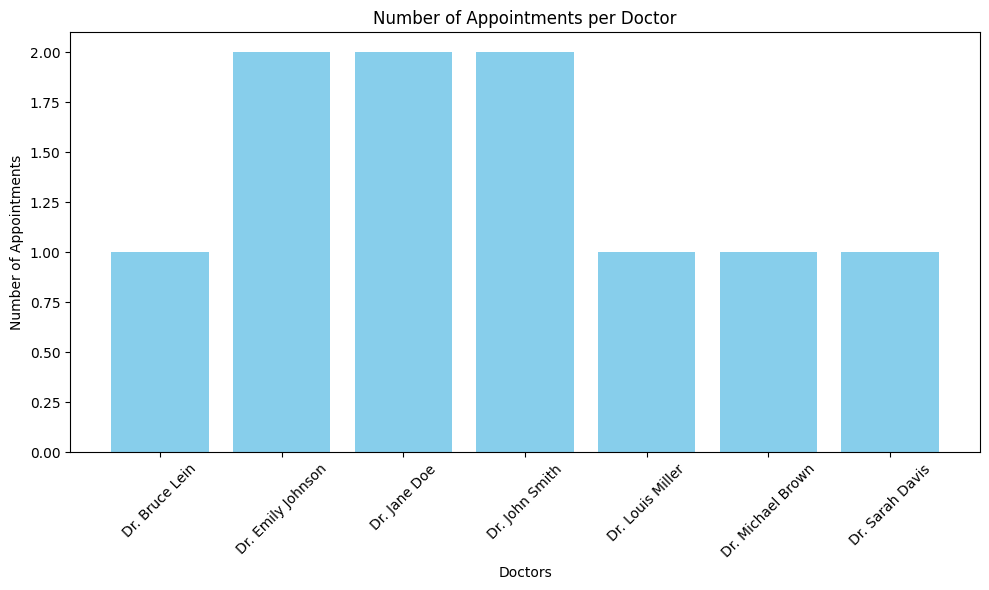

In [30]:
import matplotlib.pyplot as plt

def plot_appointments_per_doctor():
    # Povezivanje sa SQLite bazom podataka
    conn = sqlite3.connect('hospital.db')
    cursor = conn.cursor()

    # Izvođenje SQL upita za broj pregleda po doktoru
    query = '''
    SELECT Doctors.name, COUNT(Appointments.appointment_id) AS number_of_appointments
    FROM Doctors
    JOIN Appointments ON Doctors.doctor_id = Appointments.doctor_id
    GROUP BY Doctors.name;
    '''
    cursor.execute(query)
    results = cursor.fetchall()

    # Zatvaranje konekcije
    conn.close()

    # Obrada rezultata za plotovanje
    doctors = [row[0] for row in results]
    appointments = [row[1] for row in results]

    # Kreiranje grafikona
    plt.figure(figsize=(10, 6))
    plt.bar(doctors, appointments, color='skyblue')
    plt.xlabel('Doctors')
    plt.ylabel('Number of Appointments')
    plt.title('Number of Appointments per Doctor')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Pozivanje funkcije za plotovanje broja pregleda po doktoru
plot_appointments_per_doctor()


**2**. Prosecna cena tretmana po odeljenju

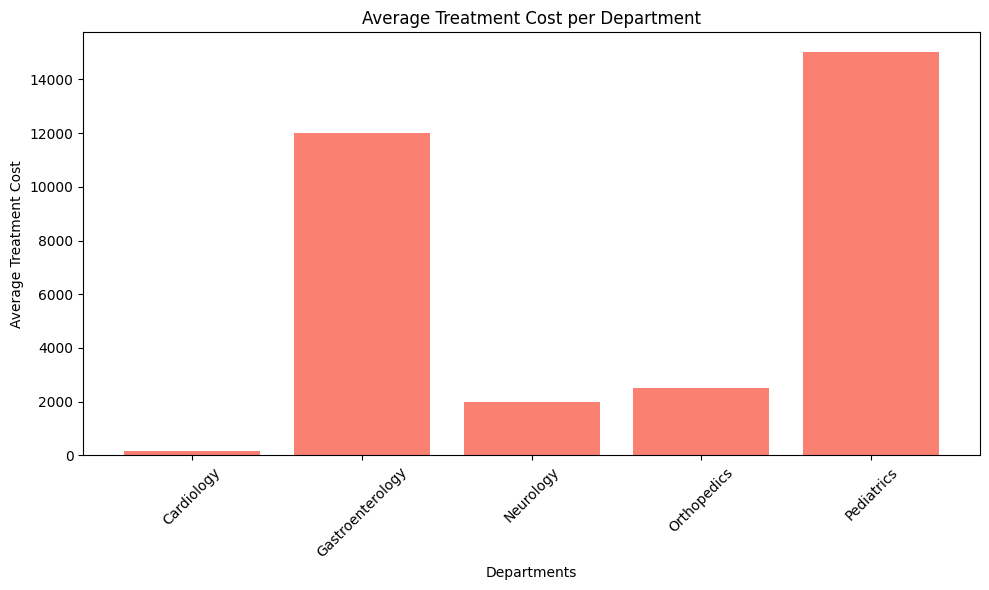

In [36]:
def plot_average_treatment_cost_per_department():
    # Povezivanje sa SQLite bazom podataka
    conn = sqlite3.connect('hospital.db')
    cursor = conn.cursor()

    # Izvođenje SQL upita za prosečan trošak tretmana po odeljenju
    query = '''
    SELECT Departments.name, AVG(Treatments.cost) AS average_treatment_cost
    FROM Treatments
    JOIN Doctors ON Treatments.treatment_id = Doctors.department_id
    JOIN Departments ON Doctors.department_id = Departments.department_id
    GROUP BY Departments.name;
    '''
    cursor.execute(query)
    results = cursor.fetchall()

    # Zatvaranje konekcije
    conn.close()

    # Obrada rezultata za plotovanje
    departments = [row[0] for row in results]
    avg_costs = [row[1] for row in results]

    # Kreiranje grafikona
    plt.figure(figsize=(10, 6))
    plt.bar(departments, avg_costs, color='salmon')
    plt.xlabel('Departments')
    plt.ylabel('Average Treatment Cost')
    plt.title('Average Treatment Cost per Department')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Pozivanje funkcije za plotovanje prosečnog troška tretmana po odeljenju
plot_average_treatment_cost_per_department()


**3**. Pacijenti koji su imali preglede između dva datuma

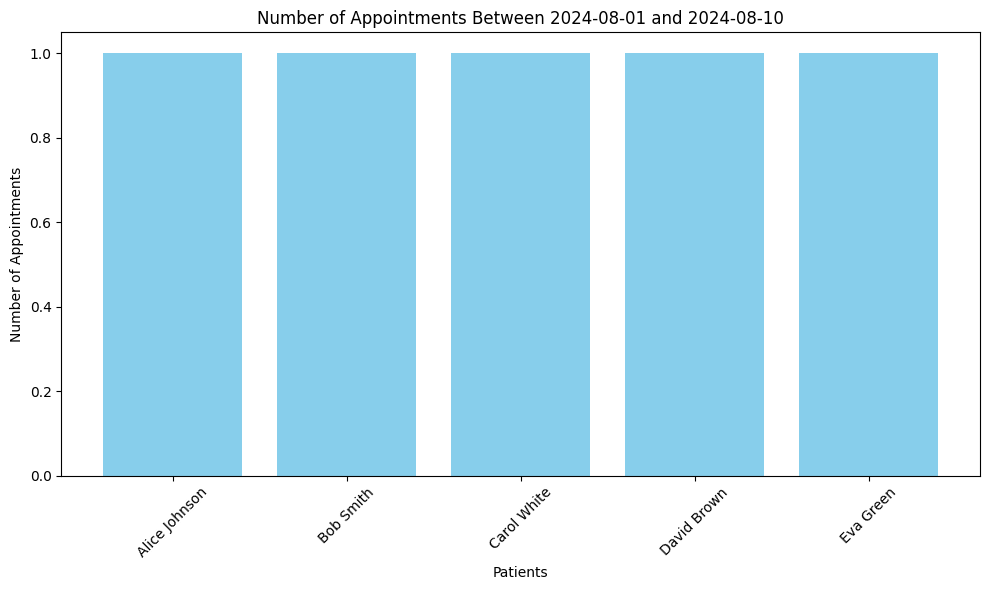

In [33]:
def plot_patients_between_dates(start_date, end_date):
    # Povezivanje sa SQLite bazom podataka
    conn = sqlite3.connect('hospital.db')
    cursor = conn.cursor()

    # Izvođenje SQL upita za pacijente sa pregledima između dva datuma
    query = '''
    SELECT Patients.name, COUNT(Appointments.appointment_id) AS number_of_appointments
    FROM Patients
    JOIN Appointments ON Patients.patient_id = Appointments.patient_id
    WHERE Appointments.appointment_date BETWEEN ? AND ?
    GROUP BY Patients.name;
    '''
    cursor.execute(query, (start_date, end_date))
    results = cursor.fetchall()

    # Zatvaranje konekcije
    conn.close()

    # Obrada rezultata za plotovanje
    patients = [row[0] for row in results]
    appointment_counts = [row[1] for row in results]

    # Kreiranje grafikona
    plt.figure(figsize=(10, 6))
    plt.bar(patients, appointment_counts, color='skyblue')
    plt.xlabel('Patients')
    plt.ylabel('Number of Appointments')
    plt.title(f'Number of Appointments Between {start_date} and {end_date}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Primer korišćenja funkcije
plot_patients_between_dates('2024-08-01', '2024-08-10')

**4**. Pacijenti koji imaju prepisane specifične lekove 

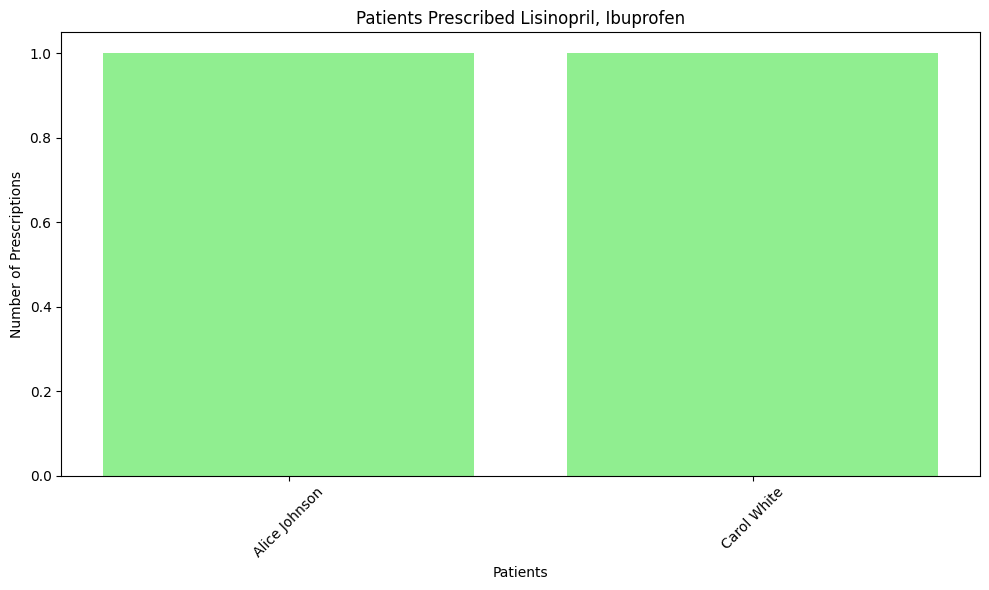

In [34]:
def plot_patients_with_medication(medications):
    # Povezivanje sa SQLite bazom podataka
    conn = sqlite3.connect('hospital.db')
    cursor = conn.cursor()

    # Izvođenje SQL upita za pacijente sa specifičnim lekovima
    query = f'''
    SELECT Patients.name, COUNT(Prescriptions.prescription_id) AS number_of_prescriptions
    FROM Patients
    JOIN Appointments ON Patients.patient_id = Appointments.patient_id
    JOIN Prescriptions ON Appointments.appointment_id = Prescriptions.appointment_id
    WHERE Prescriptions.medication_name IN ({','.join('?' for _ in medications)})
    GROUP BY Patients.name;
    '''
    cursor.execute(query, medications)
    results = cursor.fetchall()

    # Zatvaranje konekcije
    conn.close()

    # Obrada rezultata za plotovanje
    patients = [row[0] for row in results]
    prescription_counts = [row[1] for row in results]

    # Kreiranje grafikona
    plt.figure(figsize=(10, 6))
    plt.bar(patients, prescription_counts, color='lightgreen')
    plt.xlabel('Patients')
    plt.ylabel('Number of Prescriptions')
    plt.title(f'Patients Prescribed {", ".join(medications)}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Primer korišćenja funkcije
plot_patients_with_medication(['Lisinopril', 'Ibuprofen'])

## Zakljucak

U ovom projektu je napravljena i analizirana baza podataka za bolnički sistem, koristeći SQLite za rad sa podacima i Python za vizualizaciju i izvođenje statističkih analiza. Baza podataka obuhvata ključne entitete u zdravstvenom sistemu, kao što su odeljenja, doktori, pacijenti, tretmani, pregledi i recepti, što omogućava simulaciju stvarnog rada u bolnici i sprovođenje različitih statističkih analiza.    


Projekat pokazuje da je moguće izgraditi složene sisteme za upravljanje zdravstvenim podacima uz pomoć SQL-a i Python-a. Implementacija ovakvih sistema može značajno doprineti efikasnosti rada u bolnicama, boljoj organizaciji i upravljanju resursima, kao i pružanju kvalitetnije zdravstvene zaštite pacijentima. Kroz dodatna istraživanja i analize, baza podataka može biti proširena novim podacima i funkcionalnostima, čime bi se omogućilo dalje unapređenje bolničkog sistema i donošenje informisanih odluka na osnovu podataka.  

**Napomena**: Svi podaci korišćeni u ovom projektu su nasumično generisani i služe isključivo kao primeri za ilustraciju koncepta. Niti jedan podatak nema nikakvu vezu sa stvarnim osobama, institucijama ili situacijama. Podaci su korišćeni isključivo za potrebe vežbe i edukacije, a sve sličnosti sa stvarnim svetom su slučajne.